In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
import os


def generate_sine_dataset(start: float, end: float, num_samples: int):
    """
    Genera un dataset de la función seno en un rango dado.

    :param start: Inicio del rango de valores de x.
    :param end: Fin del rango de valores de x.
    :param num_samples: Número de puntos en el dataset.
    :param filename: Nombre del archivo CSV donde se guardará el dataset.
    """
    x_values = np.linspace(start, end, num_samples)
    y_values = np.sin(x_values)

    return pd.DataFrame({'x': x_values, 'y': y_values})

# Parámetros
start = -100 * np.pi  # Extender el rango en valores negativos
end = 100 * np.pi     # Extender el rango en valores positivos
num_samples = 1000000  # Número de puntos

# Generar y guardar el dataset
dataset = generate_sine_dataset(start, end, num_samples)


In [9]:
X = dataset[['x']].values
y = dataset[['y']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(1,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

# Compilar modelo
model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluar modelo
test_loss = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba: {test_loss}")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 2.4203 - val_loss: 0.6083
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.5262 - val_loss: 0.5109
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.5000 - val_loss: 0.4985
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 0.4940 - val_loss: 0.4896
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.4908 - val_loss: 0.4893
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4903
Pérdida en el conjunto de prueba: 0.4892781674861908


In [27]:
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/sine_model.h5'
model.save(model_path)
print(f"Modelo guardado en: {model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modelo guardado en: /content/drive/MyDrive/sine_model.h5


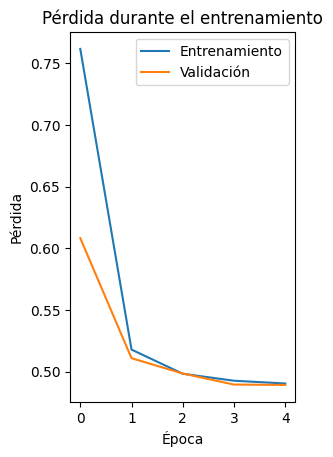

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

In [35]:
# Probar el modelo con datos personalizados
X_new = np.linspace(-np.pi, 2 * np.pi, 100).reshape(-1, 1)  # Valores de prueba
y_pred = model.predict(X_new)

# Mostrar resultados

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


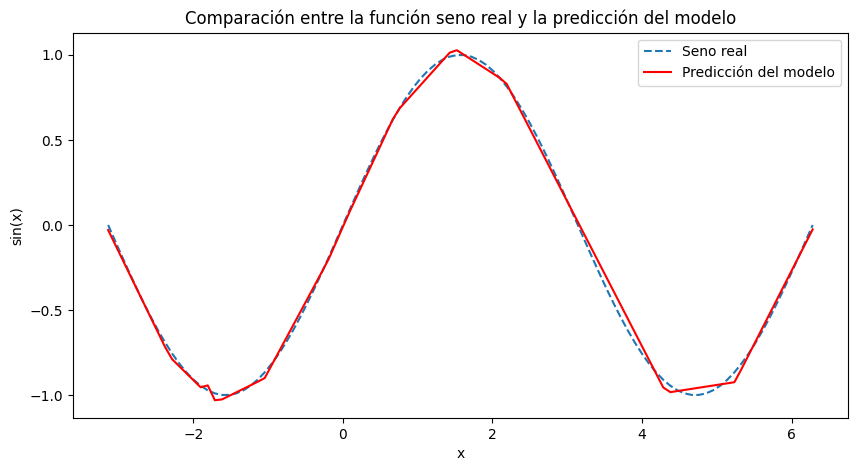

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(X_new, np.sin(X_new), label='Seno real', linestyle='dashed')
plt.plot(X_new, y_pred, label='Predicción del modelo', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Comparación entre la función seno real y la predicción del modelo')
plt.show()

In [37]:
from tensorflow.keras.models import load_model

# Ruta del modelo guardado
model_h5_path = '/content/drive/MyDrive/sine_model.h5'

# Cargar el modelo
loaded_model = load_model(model_h5_path)
print("Modelo cargado exitosamente.")

# Probar el modelo cargado con nuevos datos
X_test_new = np.linspace(-2 * np.pi, 2 * np.pi, 100).reshape(-1, 1)
y_test_pred = loaded_model.predict(X_test_new)

# Graficar comparación
plt.figure(figsize=(10, 5))
plt.plot(X_test_new, np.sin(X_test_new), label='Seno real', linestyle='dashed')
plt.plot(X_test_new, y_test_pred, label='Predicción del modelo cargado', color='green')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Comparación entre la función seno real y el modelo cargado')
plt.show()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/sine_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)